## In this project, we optimize the drag power of a wind turbine subject to certain constraints. 

Part of the Hack For Good Hackathon in Whitby (https://www.hackathon.com/event/hack-for-good---hackathon-for-environmental-innovation-41254373943), our team was trying to find optimal ways for people to design their own wind generators at home! This project was done to test the feasibility of this idea. 

### We follow the wind turbine equations outlined in (https://www.wikiwand.com/en/Wind-turbine_aerodynamics), and use the python cvxopt package to find the maximum of the the constrained convex optimization problem. 

P = 1/2 * rho * A * C * (U * V^2 - 2 * V * U^2 + U^3)
             
             
Where rho is the air density (fixed), A is the area of the wind turbine (fixed), C is the drag coefficient of the wind turbine (fixed), U is the product of the (fixed) rotational wind speed Omega and the (variable) blade radius r, V is the wind speed. So, our variable of optimization is the radius of the wind turbine blade r, with constraints that it should remain within a certain bound, let's say the blade radius r has to be between one and two meters in length for now. We will assume, without loss of generality, that C=1 for now. 

In [29]:
import cvxpy as cp
import numpy as np

# We can set l = U/V, and make the substitution to simplify the problem:
# Set up the optimization objective
# P = C * (l - 2 * l**2 + l ** 3)

# Set up the optimization constraints
# create data P
C = cp.Parameter((1,1))
l = cp.Variable((1,1), PSD=True)
                 
# Relax it to a convex optimization problem, around the area [0, 1]:
# In terms of the taylor expansion, this would be equal to removing the cubic term
objective = cp.Maximize((l - 2 * cp.square(l)))
prob = cp.Problem(objective, [l >= 0.1, l <= 0.2])
C.value = np.matrix('1')
prob.solve()
print("Problem Stats =", prob.status)
print("Optimal value =", prob.value)
print("Optimal Wind Turbine radius value  =", l.value)

Problem Stats = optimal
Optimal value = 0.1200000019631919
Optimal Wind Turbine radius value  = [[0.2]]


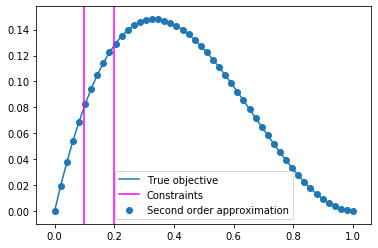

In [35]:
# Problem seems to be convex, let's plot the objective function as it varies with l
import matplotlib.pyplot as plt
p = lambda x: 1 * (x - 2 * np.power(x, 2) + np.power(x, 3))
p_approx = lambda x: 1 * (x - 2 * np.power(x, 2) + np.power(x, 3))
x = np.linspace(0, 1, 50)
plt.plot(x, p(x), label="True objective")
plt.scatter(x, p_approx(x), label="Second order approximation")
plt.axvline(x=0.1, label="Constraints", c='magenta')
plt.axvline(x=0.2, c='magenta')
plt.legend()

## We found that the wind turbine optimization problem can be relaxed to a convex optimization problem in the domain of the constraints, a solution was found and it was found that the constraints were active up until a wind turbine blade radius length of 1.0. 